# Equipo #10



- Grupo 003, Viernes 6-9

1803561 López Peña Marcelo Adrián

1809399 Villarreal Martínez Estibalyz

1863305 Zuñiga Cedillo Milton Humberto

# Students Performance in Exams

- En esta base de datos se recopila información acerca del desempeño de alumnos en sus distintos exámenes, tomando en consideración diferentes datos que puedan afectar el rendimiento estos siendo su género, el nivel de educación de los padres, su almuerzo, y su preparación antes del examen

In [2]:
import pandas as pd
import seaborn as sns

Importamos las librerias que se utilizaran

In [3]:
df_excel = pd.read_excel('C:/Users/Usuario/Desktop/FCFM/5 semestre/Mineria de datos/StudentsPerformance.xlsx')

Lectura de la base de datos

In [6]:
print('\t Base de datos sin modificar')
print("(filas, columnas) =", df_excel.shape)
print(df_excel.dtypes)
df_excel.head()

	 Base de datos sin modificar
(filas, columnas) = (1000, 8)
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's,standard,none,90,95,93
3,male,group A,associate's,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Se muestra la base de datos antes de que sea modificada, podemos ver como tiene 1000 filas y 8 columnas ademas de el tipo de dato en cada columna

In [7]:
df_mod = df_excel.drop('race/ethnicity',axis = 1 )

Se opto por eliminar la columna 'race/ethnicity' debido a que la propia página decide mantener el significado de cada letra oculto, por lo que nosotros optamos por descartarla ya que no queremos informacion que no sea entendible 

In [8]:
df_mod.isnull().sum()

gender                         0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Podemos ver como ninguna columna tiene datos nulos por lo que trabajaremos la base de datos tal cual la tenemos

In [9]:
df_mod1 = df_mod.rename(columns = {'parental level of education':'parental_education'})
df_mod2 = df_mod1.rename(columns = {'test preparation course':'preparation'})
df_mod3 = df_mod2.rename(columns = {'math score':'math_score'})
df_mod4 = df_mod3.rename(columns = {'reading score':'reading_score'})
df = df_mod4.rename(columns = {'writing score':'writing_score'})
print('\t Base de datos modificada')
print("(filas, columnas) =", df.shape)
print(df.dtypes)
df.head()

	 Base de datos modificada
(filas, columnas) = (1000, 7)
gender                object
parental_education    object
lunch                 object
preparation           object
math_score             int64
reading_score          int64
writing_score          int64
dtype: object


,gender,parental_education,lunch,preparation,math_score,reading_score,writing_score
0,female,bachelor's,standard,none,72,72,74
1,female,some college,standard,completed,69,90,88
2,female,master's,standard,none,90,95,93
3,male,associate's,free/reduced,none,47,57,44
4,male,some college,standard,none,76,78,75


Se cambiaron los nombres de las columnas ya que algunos contaban con espacios por lo que lo hicimos mas amigable para el sistema

In [10]:
print('\t Matematicas')
print('Promedio: ', df['math_score'].mean())
print('Minimo: ', df['math_score'].min())
print('Maximo: ', df['math_score'].max())

	 Matematicas
Promedio:  66.089
Minimo:  0
Maximo:  100


In [11]:
print('\t Lectura')
print('Promedio: ', df['reading_score'].mean())
print('Minimo: ', df['reading_score'].min())
print('Maximo: ', df['reading_score'].max())

	 Lectura
Promedio:  69.169
Minimo:  17
Maximo:  100


In [12]:
print('\t Escritura')
print('Promedio: ', df['writing_score'].mean())
print('Minimo: ', df['writing_score'].min())
print('Maximo: ', df['writing_score'].max())

	 Escritura
Promedio:  68.054
Minimo:  10
Maximo:  100


In [13]:
print('\t Correlaciones')
df.corr()

	 Correlaciones


,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


Utilizamos el promedio, minimo y maximo de cada asignatura para darnos una idea de que rango de datos encontraremos en cada una de ellas, donde podemos apreciar que el peor promedio es en matematicas, seguido de escritura mientras el mas alto es lectura tambien se observa como matematicas es la unica asignatura con un minimo de cero

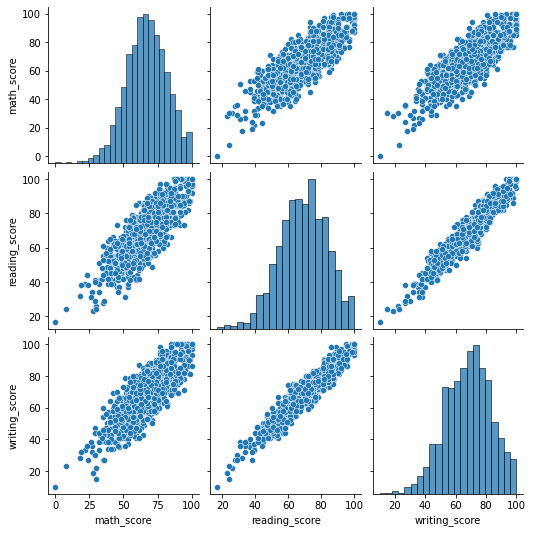

In [15]:
sns.pairplot(df[['math_score', 'reading_score', 'writing_score']])

Podemos analizar de forma grafica las correlaciones entre las calificaciones, se ve claramente como la calificacion de lectura esta muy correlacionada con las de escritura, ademas de que apreciamos los histogramas, donde la tendencia es que una gran parte si acredita sus examenes.

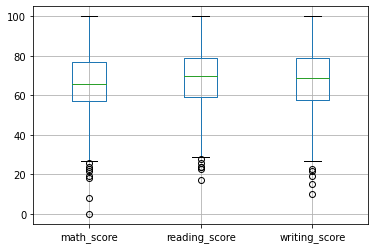

In [234]:
df.boxplot()

Podemos observar un diagrama de caja que nos representa las calificaciones obtenidas en las 3 materias, podemos observar como en las 3 materias se mantiene una mayor concentración de los resultados en los valores 60-80 aproximadamente, esto podemos inferirlo como que la mayoría de alumnos mantienen el mismo conocimiento en las 3 materias por igual.

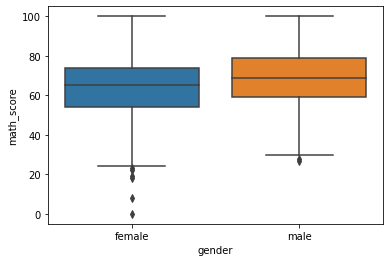

In [235]:
df = df[df.gender.isin(df.gender.value_counts().head(5).index)]

sns.boxplot(
    x='gender',
    y='math_score',
    data=df
)

Podemos ver las calificaciones de matematicas repartidas en ambos sexos y como podemos observar las mujeres tienen una menor calificacion en esta area, no solo teniendo los resultados mas bajos si no también mateniendo sus cuartiles mas bajos que los hombres.

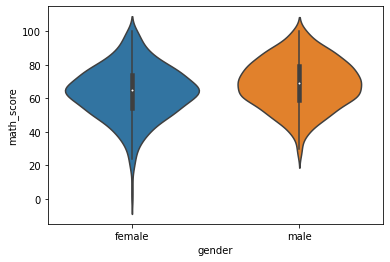

In [236]:
sns.violinplot(
    x='gender',
    y='math_score',
    data=df[df.gender.isin(df.gender.value_counts()[:5].index)]
)

Este gráfico de violin nos representa lo mismo que el diagrama de caja anterior.

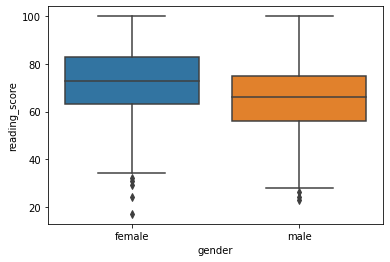

In [237]:
df = df[df.gender.isin(df.gender.value_counts().head(5).index)]

sns.boxplot(
    x='gender',
    y='reading_score',
    data=df
)

Gráfico de caja que nos presenta las calificaciones en el area de lectura separadas por generos, a diferencia del area de matematicas podemos observar que las mujeres tienen sus cuartiles posicionados arriba de los hombres, sin embargo las mujeres siguen mantendiendo las calificaciones mas bajas en sus picos inferiores.

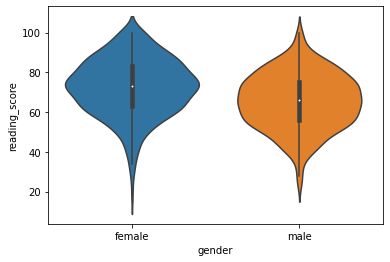

In [238]:
sns.violinplot(
    x='gender',
    y='reading_score',
    data=df[df.gender.isin(df.gender.value_counts()[:5].index)]
)

El mismo gráfico anterior pero de tipo violin

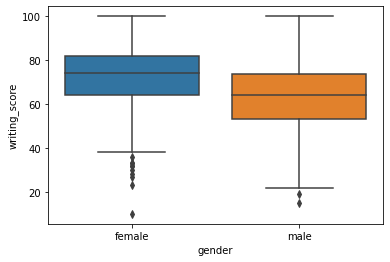

In [17]:
df = df[df.gender.isin(df.gender.value_counts().head(5).index)]

sns.boxplot(
    x='gender',
    y='writing_score',
    data=df
)

Nos muestra las calificaciones obtenidas en el area de escritura separada por generos, al igual que en el area de lectura las mujeres obtienen cuartiles superiores a los hombres, pero sus extremos minimo son menores, con esto podemos inferir que las mujeres sobresalen en las areas que tienen que ver con letras mientras los hombres en los numeros.

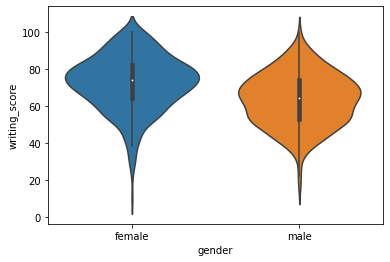

In [240]:
sns.violinplot(
    x='gender',
    y='writing_score',
    data=df[df.gender.isin(df.gender.value_counts()[:5].index)]
)

Mismos datos anteriores pero como gráfico de violin

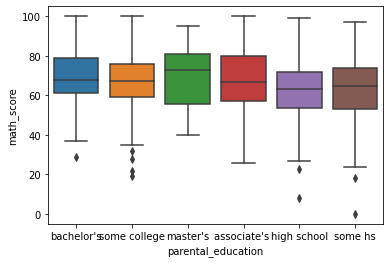

In [241]:
df = df[df.lunch.isin(df.lunch.value_counts().head().index)]

sns.boxplot(
    x='parental_education',
    y='math_score',
    #hue='gender',
    data=df
)

Este grafico nos parecio muy interesante ya que nos separa las calificaciones de matematicas dependiendo de el titulo que tengan los padres, podemos apreciar que no existe una diferencia muy enorme entre ninguno de ellos, teniendo en cuenta que la mayoria contiene sus cuartiles en el rango aprobatorio, sin embargo podemos apreciar como los alumnos con padres con maestrias no obtuvieron calificaciones superiores a 90 y en los otros si, además en los padres que no obtienen ningun titulo importante podemos apreciar las calificaciones mas bajas, pero son excepciones

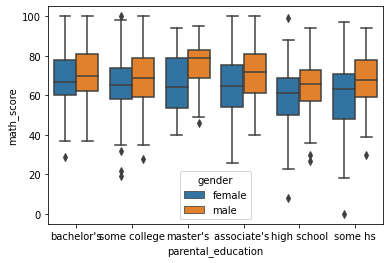

In [214]:
df = df[df.lunch.isin(df.lunch.value_counts().head().index)]

sns.boxplot(
    x='parental_education',
    y='math_score',
    hue='gender',
    data=df
)

Al igual que el gráfico anterior este es muy importante y nos muestra algo muy similar, que son las calificaiones obtenidas en matematicas dependiendo del titulo de los padres, pero esta vez separadas por generos, ppodemos apreciar como las calificaciones mas inferiores en todas las zonas se mantienen por mujeres y los cuartiles de estas también tienden a ser inferiores.

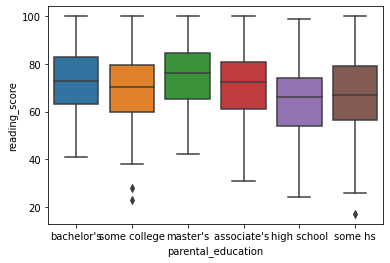

In [215]:
df = df[df.lunch.isin(df.lunch.value_counts().head().index)]

sns.boxplot(
    x='parental_education',
    y='reading_score',
    #hue='gender',
    data=df
)

Nos muestran las calificaciones obtenidas en el area de lectura dependiendo del titulo de los padres, podemos apreciar algo muy similar que en matematicas y esto siendo que los cuartiles se mantienen muy parecidos pero si podemos notar como por una diferencia muy corta las calificaciones mas bajas se mantienen en los padres que no tienen titulos universitarios o superior.

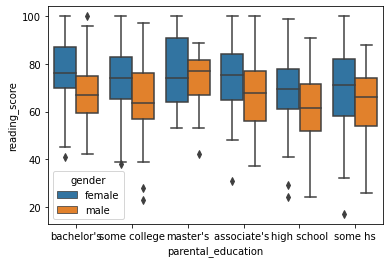

In [216]:
df = df[df.lunch.isin(df.lunch.value_counts().head().index)]

sns.boxplot(
    x='parental_education',
    y='reading_score',
    hue='gender',
    data=df
)

En este gráfico de la materia de lectura podemos apreciar algo diferente que en el are matematica, los hombres mantienen las calificaciones mucho mas bajas que las mujeres, siendo las mas bajas de estas en las zonas donde los padres no tienen titulos universitarios o superior.

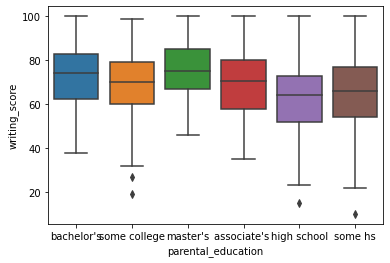

In [217]:
df = df[df.lunch.isin(df.lunch.value_counts().head().index)]

sns.boxplot(
    x='parental_education',
    y='writing_score',
    #hue='gender',
    data=df
)

Este gráfico nos muestra las calificaciones de escritura separadas por los titulos obtenidos de los padres, y se mantiene la regla de que aunque sus cuartiles no estan muy separados, si podemos observar una pequeña disminucion en las calificaciones donde los padres no tienen titutlos universitarios.

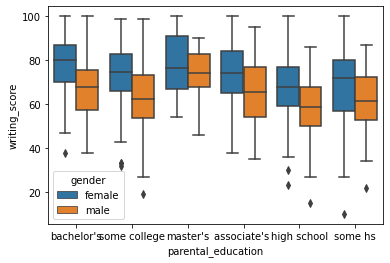

In [218]:
df = df[df.lunch.isin(df.lunch.value_counts().head().index)]

sns.boxplot(
    x='parental_education',
    y='writing_score',
    hue='gender',
    data=df
)

Mateniendo nuestra conclusión anterior de que en el area de letras los hombres mantienen calificaciones inferiores, se mantiene la regla, ademas seguimos observando una pequeña disminución en las areas donde los padres no tienen titulos universitarios.

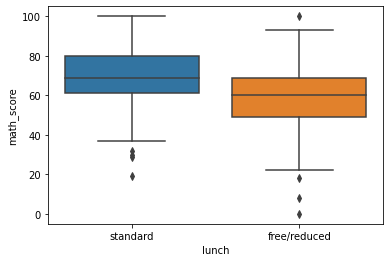

In [247]:
df = df[df.lunch.isin(df.lunch.value_counts().head().index)]

sns.boxplot(
    x='lunch',
    y='math_score',
    #hue='gender',
    data=df
)

En la siguiente gráfica en el area de matematicas podemos observar la diferencia entre los alumnos y el almuerzo que estos botuvieron y podemos notar como los alumnos que tienen un almuerzo estandar mantienen calificaciones mucho superiores a los otros. 

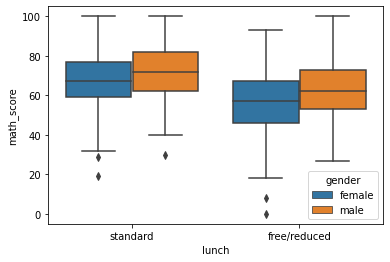

In [18]:
df = df[df.lunch.isin(df.lunch.value_counts().head().index)]

sns.boxplot(
    x='lunch',
    y='math_score',
    hue='gender',
    data=df
)

Manteniendo la regla de que en el area matematica las mujeres obtienen calificaciones inferiores podemos observar que aun asi existe una diferencia enorme entre los alumnos que obtuvieron un almuerzo estandar.

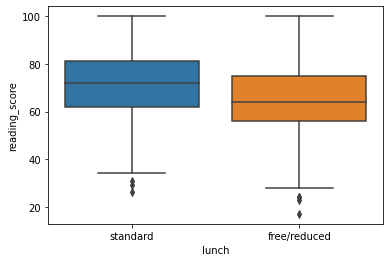

In [250]:
df = df[df.lunch.isin(df.lunch.value_counts().head().index)]

sns.boxplot(
    x='lunch',
    y='reading_score',
    #hue='gender',
    data=df
)

Podemos observar al igual que en el area de matematicas que el area de reading no rompe la regla y el almuerzo genera una diferencia muy grande entre las calificaciones obtenidas.

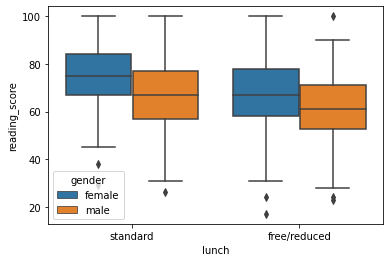

In [251]:
df = df[df.lunch.isin(df.lunch.value_counts().head().index)]

sns.boxplot(
    x='lunch',
    y='reading_score',
    hue='gender',
    data=df
)

Siendo esta el area de lectura podemos observar como las mujeres sobresalen a los hombres, pero el almuerzo sigue siendo una parte importante a la hora de los resultados, algo que parece curioso es que las mujeres con almuerzo "free" obitnene resultados muy parecidos a los hombres con almuerzo estandar.

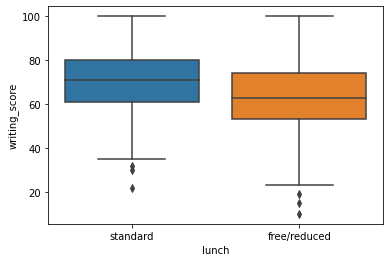

In [252]:
df = df[df.lunch.isin(df.lunch.value_counts().head().index)]

sns.boxplot(
    x='lunch',
    y='writing_score',
    #hue='gender',
    data=df
)

Como ultimo resultado obtenido del almuerzo mantenemos la regla que toma una importante factor a la hora de las calificaciones manteniendo una diferencia grande entre ambas.

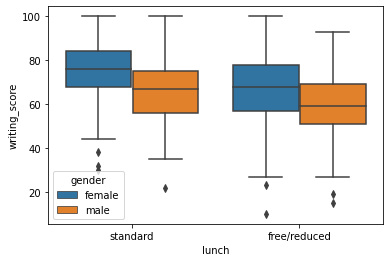

In [19]:
df = df[df.lunch.isin(df.lunch.value_counts().head().index)]

sns.boxplot(
    x='lunch',
    y='writing_score',
    hue='gender',
    data=df
)

Manteniendo la diferencia antes mencionada del almuerzo, en esta ocasion en el area de escritura las mujeres con almuerzos "free" obtuvieron icnluso mejores calificaciones que los hombres con almuerzos estandar.

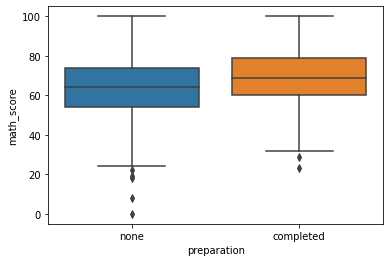

In [254]:
df = df[df.preparation.isin(df.preparation.value_counts().head().index)]

sns.boxplot(
    x='preparation',
    y='math_score',
    #hue='gender',
    data=df
)

La preparación en el area de matematicas toma un importante factor siendo las calificaciones del area preparada mucho superiores al area no preparada.

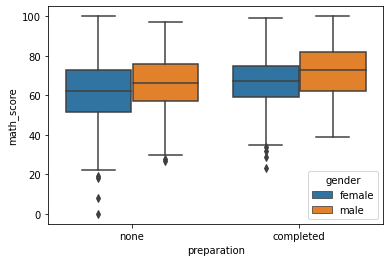

In [255]:
df = df[df.preparation.isin(df.preparation.value_counts().head().index)]

sns.boxplot(
    x='preparation',
    y='math_score',
    hue='gender',
    data=df
)

Podemos apreciar que las calificaciones de los hombres que no se prepararon para el examen son superiores que las mujeres que si estuvieron preparadas para este.

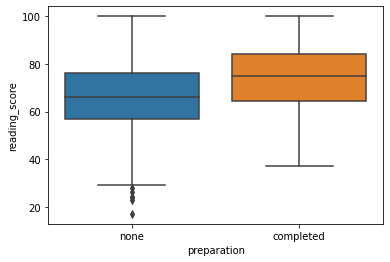

In [256]:
df = df[df.preparation.isin(df.preparation.value_counts().head().index)]

sns.boxplot(
    x='preparation',
    y='reading_score',
    #hue='gender',
    data=df
)

En el area de lectura la preparacion tambien parece tomar un factor importante manteniendo calificaciones mucho superiores sobre la gente que no se prepraro.

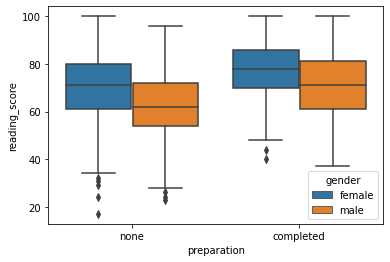

In [257]:
df = df[df.preparation.isin(df.preparation.value_counts().head().index)]

sns.boxplot(
    x='preparation',
    y='reading_score',
    hue='gender',
    data=df
)

Podemos observar que las mujeres que no se prepararon en el area de lectura obtienen calificaciones muy similares a los hombres que si se prepararon en esta area.

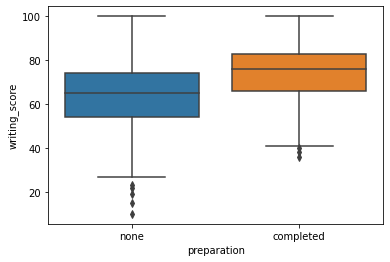

In [258]:
df = df[df.preparation.isin(df.preparation.value_counts().head().index)]

sns.boxplot(
    x='preparation',
    y='writing_score',
    #hue='gender',
    data=df
)

En el area de escritura volvemos a ver el mismo patron que la preparación nos otorga mejores resultados.

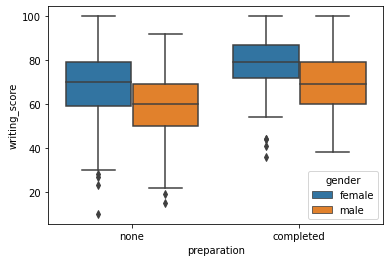

In [259]:
df = df[df.preparation.isin(df.preparation.value_counts().head().index)]

sns.boxplot(
    x='preparation',
    y='writing_score',
    hue='gender',
    data=df
)

Podemos observar como la gente preprada para el area obtiene mejores calificaciones, pero al igual que en lectura en el area de escritura las mujeres no preparadas obitnene calificaciones muy similares a los hombres preparados.

## Conclusion global:

El rendimiento de los estudiantes es un tema que siempre nos ha interesado y poder entender las características que pueden afectar estos resultados para así en un futuro poder mejorar los resultados.

Enlas gráficas que obtuvimos nosotros pudimos observar que las calificaciones de lectura y escritura mantienen un patrón muy similar, teniendo estas calificaciones muy parecidas pudiendo intentar concluir que estas al ser ambas relacionadas con el conocimiento de la lengua pueden ir de la mano en calificaciones, siendo las mujeres las que sobresalen en esta area, sin embargo en el área de matemáticas los hombres fueron mas superiores a las mujeres.
pudimos observar diferentes factores que pueden afectar a la hora de resolver un exámen, el factor que nosotros observamos que tomaba un papel menos importante a la hora de obtener resultados fue la preparación de los padres, que sin embargo si habia una pequeña disminución en las calificaciones obtenidas por estudiantes con padres sin titulos universitarios, no era algo muy enorme que hiciera una diferencia consierable, por otra parte areas como el almuerzo, la preparación o incluso el sexo del estudiante tomaban un papel muy importante a la hora de los resultados, siendo las diferencias de estas calificaciones mucha.

creemos que estudios como estos nos pueden ayudar a mejorar el desempeño de los estudiantes a la hora de realizar examenes, y factores que podemos pensar que no afectaran a la hora de nuestro examen pueden llegar a tener una importancia muy grande.

## Objetivos: 

### Principal

- Poder entender si existe una relacón entre las situaciones anteriores o ajenas al examen con el resultado de sus calificaciones, para asi lograr obtener en un futuro el maximo rendimiento de los alumnos.


### Secundarios

- Entender si existe una relación individual comun en cada una de las asignaciones dependiendo de algun factor externo al examen.
- Ver si existe relacion entre las calificaciones y el genero de la persona que presenta